# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Shifa Nur'aeni
- **Email:** shifanuraeni5@gmail.com
- **ID Dicoding:** shifa_nuraeni

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Memuat tabel customers
customers_df = pd.read_csv("data\customers_dataset.csv")
customers_df.head()

In [ ]:
#Load tabel orders
orders_df = pd.read_csv("data\orders_dataset.csv")
orders_df.head()

In [ ]:
#Memuat tabel product
product_df = pd.read_csv("data\products_dataset.csv")
product_df.head()

In [ ]:
#Load tabel order items
order_items_df = pd.read_csv("data\order_items_dataset.csv")
order_items_df.head()

**Insight:**
- Kode diatas akan memuat tabel customers dan menampilkan 5 baris pertama dari DataFrame customers_df
- Kode diatas akan memuat tabel orders dan menampilkan 5 baris pertama dari DataFrame orders_df
- Kode diatas akan memuat tabel product dan menampilkan 5 baris pertama dari DataFrame product_df
- Kode diatas akan memuat tabel order items dan menampilkan 5 baris pertama dari DataFrame order_items_df


### Assessing Data

**Menilai Data customerd_df**

In [ ]:
customers_df.info()


In [ ]:
customers_df.isna().sum()


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())


In [ ]:
customers_df.describe()


**Menilai Data orders_df**

In [ ]:
orders_df.info()


In [ ]:
orders_df.describe()


In [ ]:
orders_df.isna().sum()


In [ ]:
orders_df.describe()


**Menilai Data product_df**

In [ ]:
product_df.info()


In [ ]:
product_df.isna().sum()


In [ ]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())


In [ ]:
product_df.describe()


**Menilai Data order_items_df**

In [ ]:
order_items_df.info()


In [ ]:
order_items_df.isna().sum()


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())


In [ ]:
order_items_df.describe()


**Insight:**
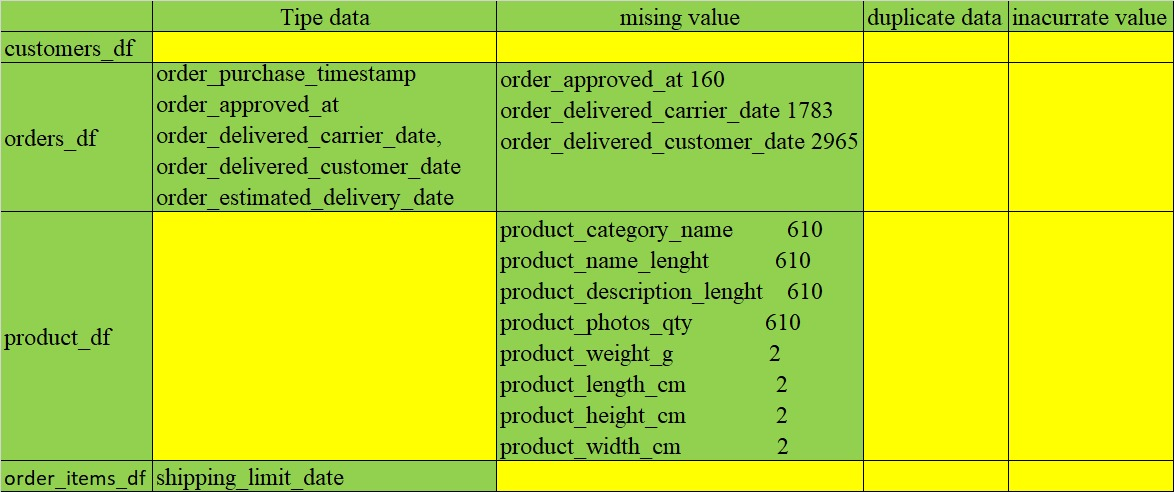

### Cleaning Data

**Membersihkan Data orders_df**


In [ ]:
orders_df[orders_df.order_approved_at.isna()]


In [ ]:
orders_df.order_approved_at.value_counts()


In [ ]:
orders_df[orders_df.order_delivered_carrier_date.isna()]


In [ ]:
orders_df.order_delivered_carrier_date.value_counts()


In [ ]:
orders_df[orders_df.order_delivered_customer_date.isna()]


In [ ]:
orders_df.order_delivered_customer_date.value_counts()


In [ ]:
orders_df.fillna(value={"order_approved_at": "2018-02-27 04:31:10",
                        "order_delivered_carrier_date": "2018-05-09 15:48:00",
                        "order_delivered_customer_date": "2018-05-08 19:36:48"},
                        inplace=True)


In [ ]:
orders_df.isna().sum()


In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()


**Membersihkan Data product_df**

In [ ]:
product_df[product_df.product_category_name.isna()]


In [ ]:
product_df.product_category_name.value_counts()


In [ ]:
product_df[product_df.product_name_lenght.isna()]


In [ ]:
product_df.product_name_lenght.value_counts()


In [ ]:
product_df[product_df.product_description_lenght.isna()]


In [ ]:
product_df.product_description_lenght.value_counts()


In [ ]:
product_df[product_df.product_photos_qty.isna()]


In [ ]:
product_df.product_photos_qty.value_counts()


In [ ]:
product_df[product_df.product_weight_g.isna()]


In [ ]:
product_df.product_weight_g.value_counts()


In [ ]:
product_df[product_df.product_length_cm.isna()]


In [ ]:
product_df.product_length_cm.value_counts()


In [ ]:
product_df[product_df.product_height_cm.isna()]


In [ ]:
product_df.product_height_cm.value_counts()


In [ ]:
product_df[product_df.product_width_cm.isna()]


In [ ]:
product_df.product_width_cm.value_counts()


In [ ]:
product_df.fillna(value={"product_category_name": "cama_mesa_banho",
                        "product_name_lenght": 60.0,
                        "product_description_lenght": 404.0,
                        "product_photos_qty": 1.0,
                        "product_weight_g": 200.0,
                        "product_length_cm": 16.0,
                        "product_height_cm": 10.0,
                        "product_width_cm": 11.0},
                        inplace=True)

In [ ]:
product_df.isna().sum()


**Memebersihkan Data order_items_df**

In [ ]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])


In [ ]:
order_items_df.info()


**Insight:**
- Tipe data pada orders_df sudah diperbaiki
- Missing value pada order_df sudah diperbaiki
- Missing value pada product_df sudah diperbaiki
- Tipe data pada order_items_df sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore ...

**Eskplorasi Data customers_df**

In [ ]:
customers_df.describe(include="all")


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


In [ ]:
customers_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)


**Eksplorasi Data orders_df**

In [ ]:
orders_df.describe(include="all")


In [ ]:
unique_statuses = orders_df["order_status"].unique()

print("Status unik dalam kolom order_status:")
print(unique_statuses)

**Eksplorasi Data order_items_df**

In [ ]:
order_items_df.describe(include="all")


In [ ]:
# Group by 'order_id' dan 'product_id' untuk menghitung jumlah pembelian
quantity_df = order_items_df.groupby(['order_id', 'product_id']).size().reset_index(name='quantity')

# Gabungkan hasil ke order_items_df
order_items_df = order_items_df.merge(quantity_df, on=['order_id', 'product_id'], how='left')

# order_items_df sekarang memiliki kolom 'quantity'


In [ ]:
# Buat kolom 'total_price' dengan mengalikan 'price' dan 'quantity'
order_items_df['total_price'] = order_items_df['price'] * order_items_df['quantity']


In [ ]:
order_items_df.head()


In [ ]:
order_items_df.describe(include="all")


In [ ]:
order_items_df.sort_values(by="price", ascending=False)


**Eksplorasi Data orders_df dan customers_df**

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

In [ ]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)


In [ ]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)


In [ ]:
orders_customers_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False)


In [ ]:
orders_customers_df["status_group"] = orders_customers_df.order_status.apply(
    lambda x: "Completed" if x in ["delivered", "shipped"] else (
        "In Progress" if x in ["processing", "invoiced"] else (
            "Canceled" if x == "canceled" else "New"
        )
    )
)
#orders_customers_df.groupby(by="status_group")["count"].sum().sort_values(ascending=False)
orders_customers_df.groupby(by="status_group").order_id.nunique().sort_values(ascending=False)

**Eksplorasi Data product_df dan order_items_df**

In [ ]:
seller_product_df = pd.merge(
    left=product_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_product_df.head()

In [ ]:
seller_product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

In [ ]:
seller_product_df.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "quantity": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

**Eksplorasi Data all_df**

In [ ]:
all_df = pd.merge(
    left=seller_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

In [ ]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "quantity": "sum",
    "total_price": "sum"
})

In [ ]:
all_df.groupby(by=["status_group", "product_category_name"]).agg({
    "quantity": "sum",
    "total_price": "sum"
})

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [ ]:
all_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})


monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)


monthly_orders_df['order_date'] = pd.to_datetime(monthly_orders_df['order_date'], format='%Y-%m')


monthly_orders_df = monthly_orders_df.sort_values('order_date')


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"].dt.strftime('%Y-%m'), monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month in Years", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Reveneu per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [ ]:
sum_order_items_df = all_df.groupby("product_category_name").quantity.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity", y="product_category_name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana Demografi Pelanggan yang Kita Miliki?

In [ ]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_state",
    x="customer_count",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: RFM Analysis

In [ ]:
orders_df.rename(columns={'order_purchase_timestamp': 'order_date'}, inplace=True)
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max",
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

#menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis = 'x', rotation=45, labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_ylabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id), fontsize=20")
plt.show()

**Insight:**
- xxx
- xxx

## Conclusion

- Conclution pertanyaan 1

> Performa Penjualan:

Pada bulan September 2016, terdapat hanya 3 pesanan dengan revenue 537.30.
Penjualan mengalami peningkatan signifikan pada Oktober 2016 dengan 308 pesanan dan revenue mencapai 58,915.20.
November 2016 tidak mencatatkan penjualan sama sekali (order dan revenue nol).
Penjualan kembali terjadi pada Desember 2016, tetapi sangat rendah, yaitu hanya 1 pesanan dengan revenue 10.90.
Peningkatan yang sangat signifikan terlihat pada Januari 2017 dengan 789 pesanan dan revenue mencapai 156,349.23.


> Tren Revenue:

Revenue bulanan fluktuatif, menunjukkan pola yang tidak stabil.
Kinerja terbaik tercatat pada Januari 2017, sedangkan kinerja terburuk terjadi pada November 2016 dengan revenue nol.

> Kesimpulan

Performa penjualan perusahaan selama beberapa bulan terakhir menunjukkan pola yang fluktuatif, dengan puncak penjualan terjadi pada Januari 2017. Meski demikian, adanya bulan tanpa penjualan (November 2016) menjadi perhatian penting yang perlu dianalisis lebih lanjut untuk memahami faktor-faktor yang memengaruhi kinerja tersebut.

- Conclution pertanyaan 2

> Produk dengan Penjualan Terbanyak (Best Performing Product):

Produk "cama_mesa_banho" merupakan produk dengan jumlah penjualan terbanyak, mencapai lebih dari 16.000 penjualan.
Produk lain seperti "moveis_decoracao", "beleza_saude", "informatica_acessorios", dan "esporte_lazer" mengikuti di posisi berikutnya dengan penjualan yang lebih rendah.


> Produk dengan Penjualan Paling Sedikit (Worst Performing Product):

Produk "seguros_e_servicos" tercatat sebagai produk dengan jumlah penjualan paling sedikit, mendekati angka 0 penjualan.
Produk lain yang juga memiliki performa buruk termasuk "fashion_roupa_infanto_juvenil", "pc_gamer", "la_cuisine", dan "portateis_cozinha_e_preparadores_de_alimentos".


> Kesimpulan

Produk "cama_mesa_banho" memiliki performa terbaik dengan jumlah penjualan tertinggi, sementara "seguros_e_servicos" menjadi produk dengan performa terburuk karena mencatat jumlah penjualan paling sedikit. Hal ini menunjukkan perbedaan signifikan dalam minat pelanggan terhadap berbagai kategori produk.

- Conclution Pertanyaan 3

Pelanggan perusahaan terkonsentrasi di negara bagian São Paulo (SP) sebagai pasar terbesar, dengan kontribusi pelanggan yang jauh lebih tinggi dibandingkan negara bagian lainnya. Beberapa wilayah lainnya seperti RI, MG, RS menunjukkan potensi yang cukup signifikan, sementara negara bagian di bagian utara dan timur memiliki jumlah pelanggan yang sangat terbatas. Fokus strategi bisnis dapat diarahkan ke pasar utama (SP) sambil mengeksplorasi peluang di wilayah dengan pelanggan menengah dan rendah.


- Conclution Pertanyaan 4


> Frequency (Frekuensi Transaksi):

Semua pelanggan dalam data ini memiliki frekuensi transaksi sebesar 1, yang berarti setiap pelanggan hanya melakukan 1 kali pembelian. Hal ini menunjukkan rendahnya loyalitas pelanggan dan minimnya transaksi berulang.

> Monetary (Nilai Pembelian):

Nilai transaksi (monetary) bervariasi antara pelanggan, berkisar dari 54.90 hingga 179.99.
Pelanggan dengan ID "0001fd6190edaaf884bcaf3d49edf079" memiliki nilai transaksi tertinggi sebesar 179.99, sedangkan pelanggan lainnya memiliki nilai yang lebih rendah.

> Recency (Keterkinian Pembelian):

Nilai recency (waktu sejak terakhir melakukan transaksi) sangat beragam, berkisar antara 198 hingga 596 hari.
Pelanggan dengan recency tertinggi (596 hari) menunjukkan bahwa mereka sudah sangat lama tidak bertransaksi, sedangkan pelanggan dengan recency lebih rendah (198 hari) masih relatif lebih baru.











